In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=default_size)    # legend fontsize
plt.rc('figure', titlesize=default_size)

color_h2 = 'lightblue'
color_ch4 = 'lightseagreen'
color_h2o = 'darkviolet'
color_o3 = 'gold'

model_dict = { 'OSLOCTM3':'OsloCTM',
               'WACCM6-2deg':'WACCM',
               'INCA':'INCA',
               'GFDL-emi':'GFDL-emi',
               'GFDL_nudge':'GFDL',
               'UKCA':'UKCA',
               'OSLOCTM3-emi':'OsloCTM-emi'}

sorted_array = ['GFDL','OsloCTM','INCA','UKCA','WACCM','GFDL-emi','OsloCTM-emi']

In [2]:
filepath= r"./output/"
df_budget = pd.read_csv(filepath+'table_budget_h2.csv',index_col=0)
df_budget.rename(model_dict, inplace=True)
df_budget = df_budget.reindex(sorted_array)
df_budget

,H2 burden [Tg],H2 lifetime [yrs],H2 atm.loss[Tg/yr],H2 drydep [Tg/yr],H2 atm. prod [Tg/yr],H2 atmospheric lifetime [yrs],H2 estimated emissions [Tg/yr]
GFDL,188,2.40,21.7,56.6,45.0,8.66,33.3
OsloCTM,196,2.23,28.4,59.5,56.3,6.91,31.6
INCA,195,2.61,22.5,52.0,47.1,8.66,27.3
UKCA,191,1.66,26.8,88.7,49.4,7.15,66.0
WACCM,195,1.91,29.0,73.0,33.9,6.70,68.1
GFDL-emi,192,2.50,22.3,54.6,45.1,8.62,31.9
OsloCTM-emi,209,2.36,30.1,58.4,56.2,6.95,32.2


             H2 lifetime [yrs]  H2 atmospheric lifetime [yrs]
GFDL                      2.40                           8.66
OsloCTM                   2.23                           6.91
INCA                      2.61                           8.66
UKCA                      1.66                           7.15
WACCM                     1.91                           6.70
GFDL-emi                  2.50                           8.62
OsloCTM-emi               2.36                           6.95


[Text(0,0,'GFDL'),
 Text(0,0,'OsloCTM'),
 Text(0,0,'INCA'),
 Text(0,0,'UKCA'),
 Text(0,0,'WACCM'),
 Text(0,0,'GFDL-emi'),
 Text(0,0,'OsloCTM-emi')]

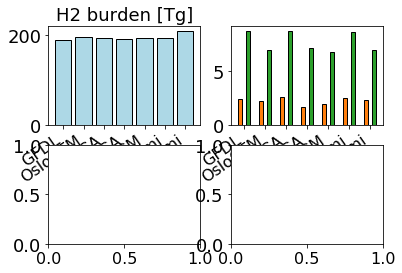

In [3]:
#plt.subplot_mosaic([['upleft','right'],['lowleft','right']], layout='constrained')
#fig, axs = plt.subplot_mosaic([['a)', 'c)'], ['b)', 'c)'], ['d)', 'd)']],
#                              constrained_layout=True)
fig, axs = plt.subplots(2, 2)
axs=axs.flatten()


plot_values = df_budget['H2 burden [Tg]']
for m,model in enumerate(df_budget.index):
    axs[0].bar(m,plot_values.loc[model],edgecolor='black',color=color_h2,label=model)
axs[0].set_title('H2 burden [Tg]')
#plt.ylabel(ytittel)

#plt.tick_params(labelbottom = False, bottom = False)
axs[0].set_xticks(np.arange(0,len(plot_values.index)))
axs[0].set_xticklabels(df_budget.index, rotation=35,horizontalalignment="right")

plot_values = df_budget[['H2 lifetime [yrs]','H2 atmospheric lifetime [yrs]']]
print(plot_values)


for m,model in enumerate(df_budget.index):
    val1 = 'H2 lifetime [yrs]'
    val2 = 'H2 atmospheric lifetime [yrs]'
    axs[1].bar(m-0.2,plot_values[val1].loc[model],width=0.2,color='C1',edgecolor='black',label='H2 lifetime [yrs]')
    axs[1].bar(m+0.2,plot_values[val2].loc[model],width=0.2,color='C2',edgecolor='black',label='H2 atmospheric lifetime [yrs]')
axs[1].set_xticks(np.arange(0,len(plot_values.index)))
axs[1].set_xticklabels(df_budget.index, rotation=35,horizontalalignment="right")


#axs[1].set_title('Lifetime')
##plt.ylabel(ytittel)#

##plt.tick_params(labelbottom = False, bottom = False)
#axs[1].set_xticks(np.arange(0,len(plot_values.index)))
#axs[1].set_xticklabels(df_budget.index, rotation=35,horizontalalignment="right")
